# Visualize RL Agent Path

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Lag-based RL Results

**Read in seismic data and RL output files**

In [ ]:
# Read input file of training paths
#  circle = pd.read_csv('src/datasets/circle_X230_Y75_r30.csv')

# Read RL output file
'''
Lag-based RL results:
Train:  output
Test:   output_eval

Forecast-based RL results:
Train:  out_rnnbase_EGreedy200K_2M
Test:   out_rnnbase_EGreedy200K_2M_evaluate
'''

# Train
sim_lag = pd.read_csv('output/simulates.csv')
r = 'reward'
sim_lag['flag'] = sim_lag[r] == r
sim_lag['cumulative_flag'] = sim_lag['flag'].cumsum()
sim_lag = sim_lag[sim_lag[r] != r]
sim_lag['float_reward'] = sim_lag['reward'].astype('float')
sim_lag['float_margin'] = sim_lag['margin'].astype('float')

# Test
eval_sim_lag = pd.read_csv('output_eval/simulates.csv')
r = 'reward'
eval_sim_lag['flag'] = eval_sim_lag[r] == r
eval_sim_lag['cumulative_flag'] = eval_sim_lag['flag'].cumsum()
eval_sim_lag = eval_sim_lag[eval_sim_lag[r] != r]
eval_sim_lag['float_reward'] = eval_sim_lag['reward'].astype('float')
eval_sim_lag['float_margin'] = eval_sim_lag['margin'].astype('float')

**Vizualize cumulative reward**

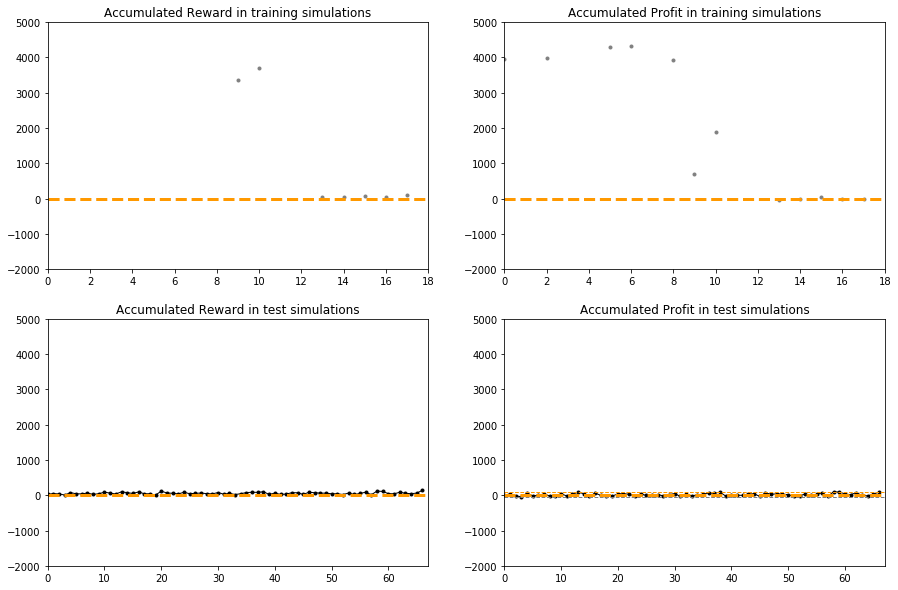

min profit = $-41.5, max profit = $94.6


In [3]:

# Select all or a sample to vizualize
samplesize = 1500000

# Compute accumulated reward per episode
reward_lag = sim_lag.iloc[:samplesize].groupby('cumulative_flag')['float_reward'].sum().values
profit_lag = sim_lag.iloc[:samplesize].groupby('cumulative_flag')['float_margin'].sum().values
eval_reward_lag = eval_sim_lag.iloc[:samplesize].groupby('cumulative_flag')['float_reward'].sum().values
eval_profit_lag = eval_sim_lag.iloc[:samplesize].groupby('cumulative_flag')['float_margin'].sum().values

# Find episode with highest reward
#best = simulations[:].groupby('cumulative_zflag')['float_reward'].sum().values.argmax()
#best_path = simulations[:][(simulations['cumulative_zflag'] == best)]

# Set up figure dimension
plt.figure(figsize=(15,10))
plt.clf()

# Vizualize agent's accumulated reward per episode
plt.subplot(221)
plt.ylim((-2000,5000))
plt.xlim((0, len(reward_lag)))
#plt.xlim((0, 7000))
plt.plot(reward_lag, marker='o', markersize=3, color='grey', lw=0)
plt.title('Accumulated Reward in training simulations')
plt.axhline(y=0, color='#ff9900', linestyle='--', lw=3)

# Vizualize agent's accumulated profit per episode
plt.subplot(222)
plt.ylim((-2000,5000))
plt.xlim((0, len(profit_lag)))
#plt.xlim((0, 7000))
plt.plot(profit_lag, marker='o', markersize=3, color='grey', lw=0)
plt.title('Accumulated Profit in training simulations')
plt.axhline(y=0, color='#ff9900', linestyle='--', lw=3)

# Vizualize agent's accumulated reward per episode
plt.subplot(223)
plt.ylim((-2000,5000))
plt.xlim((0, len(eval_reward_lag)))
#plt.xlim((0, 7000))
plt.plot(eval_reward_lag, marker='o', markersize=3, color='k', lw=1)
plt.title('Accumulated Reward in test simulations')
plt.axhline(y=0, color='#ff9900', linestyle='--', lw=3)


# Vizualize agent's accumulated profit per episode
plt.subplot(224)
plt.ylim((-2000,5000))
plt.xlim((0, len(eval_profit_lag)))
#plt.xlim((0, 7000))
plt.plot(eval_profit_lag, marker='o', markersize=3, color='k', lw=1)
plt.title('Accumulated Profit in test simulations')
plt.axhline(y=0, color='#ff9900', linestyle='--', lw=3)
plt.axhline(y=min(eval_profit_lag), color='grey', linestyle='--', lw=1)
plt.axhline(y=max(eval_profit_lag), color='#ff9900', linestyle='--', lw=1)

'''
# Check up a few of them
print('Reward for episode ',best,': ',reward[best])
print('Reward for episode ',str(5500),': ',reward[5500])
reward_path = simulations['reward'][(simulations['cumulative_zflag'] == best)]
print('Reward per step in episode ',best,':')
print(reward_path)
reward_path = simulations['reward'][(simulations['cumulative_zflag'] == 5500)]
print('Reward per step in episode ',str(5500),':')
print(reward_path)
'''
plt.show()

print('min profit = ${:.1f}, max profit = ${:.1f}'.format(min(eval_profit_lag),max(eval_profit_lag)))

# RNN forecast-based RL Results

**Read in seismic data and RL output files**

In [7]:
# Read input file of training paths
#  circle = pd.read_csv('src/datasets/circle_X230_Y75_r30.csv')

# Read RL output file

# Train
sim_rnn = pd.read_csv('out_rnnbase_EGreedy200K_2M/simulates.csv')
r = 'reward'
sim_rnn['flag'] = sim_rnn[r] == r
sim_rnn['cumulative_flag'] = sim_rnn['flag'].cumsum()
sim_rnn = sim_rnn[sim_rnn[r] != r]
sim_rnn['float_reward'] = sim_rnn['reward'].astype('float')
sim_rnn['float_margin'] = sim_rnn['margin'].astype('float')

# Test
eval_sim_rnn = pd.read_csv('out_rnnbase_EGreedy200K_2M_evaluate/simulates.csv')
r = 'reward'
eval_sim_rnn['flag'] = eval_sim_rnn[r] == r
eval_sim_rnn['cumulative_flag'] = eval_sim_rnn['flag'].cumsum()
eval_sim_rnn = eval_sim_rnn[eval_sim_rnn[r] != r]
eval_sim_rnn['float_reward'] = eval_sim_rnn['reward'].astype('float')
eval_sim_rnn['float_margin'] = eval_sim_rnn['margin'].astype('float')

FileNotFoundError: [Errno 2] File b'out_rnnbase_EGreedy200K_2M_evaluate/simulates.csv' does not exist: b'out_rnnbase_EGreedy200K_2M_evaluate/simulates.csv'

**Vizualize cumulative reward**

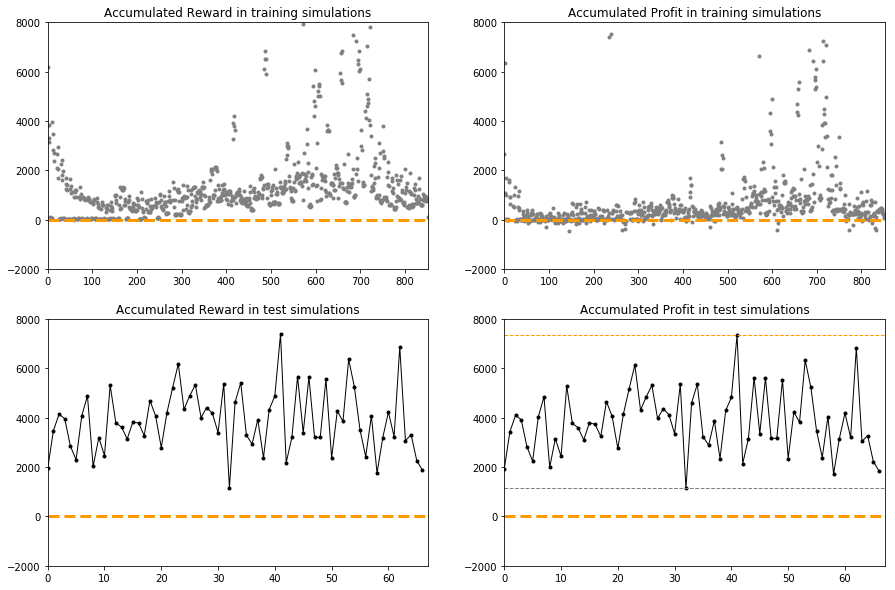

min profit = $1129.1, max profit = $7340.4


In [133]:

# Select all or a sample to vizualize
samplesize = 1500000

# Compute accumulated reward per episode
reward_rnn = sim_rnn.iloc[:samplesize].groupby('cumulative_flag')['float_reward'].sum().values
profit_rnn = sim_rnn.iloc[:samplesize].groupby('cumulative_flag')['float_margin'].sum().values
eval_reward_rnn = eval_sim_rnn.iloc[:samplesize].groupby('cumulative_flag')['float_reward'].sum().values
eval_profit_rnn = eval_sim_rnn.iloc[:samplesize].groupby('cumulative_flag')['float_margin'].sum().values

# Find episode with highest reward
#best = simulations[:].groupby('cumulative_zflag')['float_reward'].sum().values.argmax()
#best_path = simulations[:][(simulations['cumulative_zflag'] == best)]

# Set up figure dimension
plt.figure(figsize=(15,10))
plt.clf()

# Vizualize agent's accumulated reward per episode
plt.subplot(221)
plt.ylim((-2000,8000))
plt.xlim((0, len(reward_rnn)))
#plt.xlim((0, 7000))
plt.plot(reward_rnn, marker='o', markersize=3, color='grey', lw=0)
plt.title('Accumulated Reward in training simulations')
plt.axhline(y=0, color='#ff9900', linestyle='--', lw=3)

# Vizualize agent's accumulated profit per episode
plt.subplot(222)
plt.ylim((-2000,8000))
plt.xlim((0, len(profit_rnn)))
#plt.xlim((0, 7000))
plt.plot(profit_rnn, marker='o', markersize=3, color='grey', lw=0)
plt.title('Accumulated Profit in training simulations')
plt.axhline(y=0, color='#ff9900', linestyle='--', lw=3)

# Vizualize agent's accumulated reward per episode
plt.subplot(223)
plt.ylim((-2000,8000))
plt.xlim((0, len(eval_reward_rnn)))
#plt.xlim((0, 7000))
plt.plot(eval_reward_rnn, marker='o', markersize=3, color='k', lw=1)
plt.title('Accumulated Reward in test simulations')
plt.axhline(y=0, color='#ff9900', linestyle='--', lw=3)


# Vizualize agent's accumulated profit per episode
plt.subplot(224)
plt.ylim((-2000,8000))
plt.xlim((0, len(eval_profit_rnn)))
#plt.xlim((0, 7000))
plt.plot(eval_profit_rnn, marker='o', markersize=3, color='k', lw=1)
plt.title('Accumulated Profit in test simulations')
plt.axhline(y=0, color='#ff9900', linestyle='--', lw=3)
plt.axhline(y=min(eval_profit_rnn), color='grey', linestyle='--', lw=1)
plt.axhline(y=max(eval_profit_rnn), color='#ff9900', linestyle='--', lw=1)

'''
# Check up a few of them
print('Reward for episode ',best,': ',reward[best])
print('Reward for episode ',str(5500),': ',reward[5500])
reward_path = simulations['reward'][(simulations['cumulative_zflag'] == best)]
print('Reward per step in episode ',best,':')
print(reward_path)
reward_path = simulations['reward'][(simulations['cumulative_zflag'] == 5500)]
print('Reward per step in episode ',str(5500),':')
print(reward_path)
'''
plt.show()

print('min profit = ${:.1f}, max profit = ${:.1f}'.format(min(eval_profit_rnn),max(eval_profit_rnn)))